# Tarea 5: Distribución muestral

Solución de los ejercicios de la sección `Estimación y distribución de muestreo` del libro del curso [Fundamentos Estadísticos](https://tereom.github.io/fundamentos-2022/estimaci%C3%B3n-y-distribuci%C3%B3n-de-muestreo-1.html)

**Proporciones**
<br>Usaremos datos de reincidencia en conducta criminal del estado de Iowa, este estado sigue a los delincuentes por un periodo de 3 años y registra el número de días hasta reincidencia para aquellos que son readmitidos en prisión. El departamento de correcciones utiliza los datos de reincidencia para evaluar sus programas de prevención de recaída en conducta criminal.

Los datos Recidivism contienen información de todos los delincuentes condenados por dos tipos de delito durante 2010 (Recid indica si recayeron en conducta criminal).
* De éstos **31.6%** reincidieron y volvieron a prisión. Utiliza simulación para aproximar la distribución muestral de $\hat{p}$, la proporción de delincuentes que reincidieron para muestras de tamaño 25.
* Calcula el error estándar de $\hat{p}$, y compáralo con el teórico $\sqrt{p(1-p)/n}$.
* Repite para muestras de tamaño 250 y compara

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from utils import ordenar_tendencia_central, tabla_prueba_permutacion

In [2]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 '.gitignore',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [3]:
path_asignatura = "fundamentos-estadisticos"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['datos', 'libros', 'README.md']

In [4]:
#Se obtiene dataset original
file_path = "datos\\Recidivism.csv"
recidivism = pd.read_csv(os.path.join(path_asignatura, file_path))
recidivism.head()

,Gender,Age,Age25,Race,Offense,Recid,Type,Days
0,M,Under 25,Under 25,White-NonHispanic,Felony,Yes,Tech,16.0
1,M,55 and Older,Over 25,White-NonHispanic,Felony,Yes,Tech,19.0
2,M,25-34,Over 25,White-NonHispanic,Felony,Yes,Tech,22.0
3,M,55 and Older,Over 25,White-NonHispanic,Felony,Yes,Tech,25.0
4,M,25-34,Over 25,Black-NonHispanic,Felony,Yes,Tech,26.0


In [5]:
recidivism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   17019 non-null  object 
 1   Age      17019 non-null  object 
 2   Age25    17019 non-null  object 
 3   Race     16988 non-null  object 
 4   Offense  17022 non-null  object 
 5   Recid    17022 non-null  object 
 6   Type     17022 non-null  object 
 7   Days     5386 non-null   float64
dtypes: float64(1), object(7)
memory usage: 1.0+ MB


In [6]:
pct_non_null = (recidivism.shape[0] - recidivism['Days'].isna().sum()) / recidivism.shape[0]
print(f"Porcentaje de non-null en 'Days': {pct_non_null*100:.1f}%\n{'_'*40}")

Porcentaje de non-null en 'Days': 31.6%
________________________________________


**Paso 1**:
<br>Se generan las distribuciones muestrales de $\hat{p}$ para muestras de tamaño `25`, `250` y 1,000 iteraciones.

In [7]:
#1,000 iteraciones para muestras tamaño 25
sample_25 = pd.DataFrame({
    'days': [sum(~recidivism['Days'].sample(25).isna())/25 for _ in range(1_000)],
    'type': 'sample 25'
})

# #1,000 iteraciones para muestras tamaño 250
sample_250 = pd.DataFrame({
    'days': [sum(~recidivism['Days'].sample(250).isna())/250 for _ in range(1_000)],
    'type': 'sample 250'
})

#Se concatenan distribuciones en DataFrame único
results = pd.concat([sample_25, sample_250], axis=0, ignore_index=True)
results

,days,type
0,0.320,sample 25
1,0.400,sample 25
2,0.280,sample 25
3,0.240,sample 25
4,0.320,sample 25
...,...,...
1995,0.296,sample 250
1996,0.288,sample 250
1997,0.312,sample 250
1998,0.308,sample 250


**Paso 2**:
<br>Se grafican las distribuciones muestrales

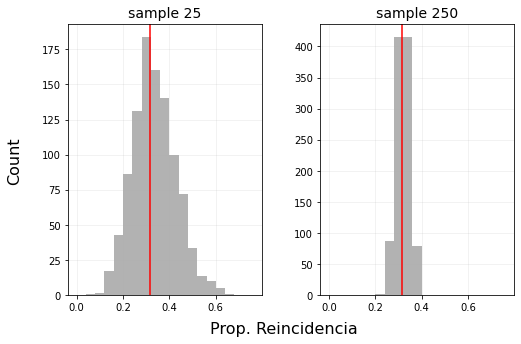

In [8]:
fig = plt.figure(figsize=(8,5))
spec = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)
bins = np.arange(0, 0.8, 0.04)

#Para muestra tamaño 25
ax0 = fig.add_subplot(spec[0])
ax0.hist(results['days'].loc[results['type'] == 'sample 25'], bins=bins, color='black', alpha=0.3)
ax0.axvline(x=pct_non_null, ymin=0, ymax=ax0.get_ylim()[1], c='red')
ax0.set_title('sample 25', fontsize=14)
ax0.grid(alpha=0.2)

#Para muestra tamaño 250
ax1 = fig.add_subplot(spec[1])
ax1.hist(results['days'].loc[results['type'] == 'sample 250'], bins=bins, color='black', alpha=0.3)
ax1.axvline(x=pct_non_null, ymin=0, ymax=ax1.get_ylim()[1], c='red')
ax1.set_title('sample 250', fontsize=14)
ax1.grid(alpha=0.2)

#Anotaciones y estilo global
fig.supxlabel('Prop. Reincidencia', fontsize=16)
fig.supylabel('Count', fontsize=16)

plt.show()

In [9]:
std_err = results['days'].loc[results['type'] == 'sample 25']
print(f"Standard error sample 25: {std_err.std():.4f}")
print(f"Standard error real: {np.sqrt(pct_non_null*(1-pct_non_null)/recidivism.shape[0]):.4f}")

Standard error sample 25: 0.0935
Standard error real: 0.0036


In [10]:
std_err = results['days'].loc[results['type'] == 'sample 250']
print(f"Standard error sample 250: {std_err.std():.4f}")
print(f"Standard error real: {np.sqrt(pct_non_null*(1-pct_non_null)/recidivism.shape[0]):.4f}")

Standard error sample 250: 0.0290
Standard error real: 0.0036


**Error estándar de una media**
<br>Supongamos que $x$ es una variable aleatoria que toma valores en los reales con distribución de probabilidad $F$. Denotamos por $\mu$ y $\sigma^2$ la media y la varianza de $F$,
$$\mu=E(x)$$
$$\sigma^2={var}(x)=E[(x-\mu)^2]$$

Ahora, sea $(X_1,...,X_n)$ una muestra aleatoria de $F$ de tamaño $n$, la media de la muestra $\bar{X}=\sum_{i=1}^n\frac{X_i}{n}$ tiene:
* Esperanza $\mu$
* varianza $\sigma^2/n$

En palabras, la esperanza de $\bar{X}$ es la misma que la esperanza de $x$, pero la varianza de $\bar{X}$ es $1/n$ veces la varianza de $x$, así que entre mayor es la $n$ tenemos una mejor estimación de $\mu$.
<br>En el caso del estimador de la media $\bar{X}$, el error estándar quedaría dado por:
$${ee}(\bar{X})=\sqrt{{var}(\bar{X})}=\frac{\sigma}{\sqrt{n}}$$

Entonces, considerando los datos de ENLACE edo. de México (ENLACE era una prueba estandarizada que se aplicaba a todos los alumnos de primaria en México), y la columna de calificaciones de español 3 de primaria (`esp_3`):
* Genera un histograma de las calificaciones de 3° de primaria. Calcula la media y la desviación estándar.
* Aproximar la distribución muestral para tamaños de muestra $n\in[10,100,1000]$
    1) Simula 5,000 muestras aleatorias
    2) Calcula la media en cada muestra
    3) Realiza un histograma de la distribución muestral de las medias (las medias del paso anterior)
    4) Aproxima el error estándar calculando la desviación estándar de las medias del paso 2).
* Calcula el error estándar de la media para cada tamaño de muestra usando la fórmula derivada arriba y compara con tus simulaciones.
* ¿Cómo se comparan los errores estándar correspondientes a los distintos tamaños de muestra?

In [11]:
#Se obtiene dataset original
file_path = "datos\\enlace_15.csv"
enlace = pd.read_csv(os.path.join(path_asignatura, file_path))
enlace.head()

,id,cve_ent,turno,tipo,esp_3,esp_6,n_eval_3,n_eval_6
0,38570,15,MATUTINO,INDêGENA,550,483,13,19
1,38571,15,MATUTINO,INDêGENA,485,490,17,18
2,38572,15,MATUTINO,INDêGENA,462,385,9,9
3,38573,15,MATUTINO,INDêGENA,646,613,33,26
4,38574,15,MATUTINO,INDêGENA,508,452,26,35


Generando histograma

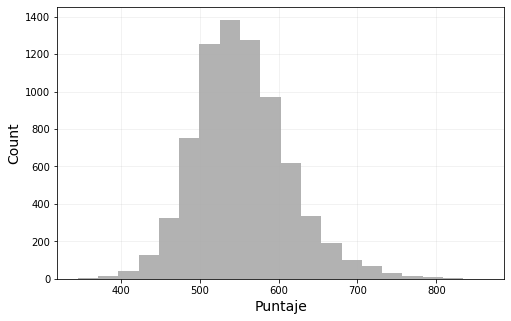

In [12]:
plt.figure(figsize=(8,5))

plt.hist(enlace['esp_3'], bins=20, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.xlabel('Puntaje', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

In [13]:
print(f"Mean: {enlace['esp_3'].mean():.2f}")
print(f"Std: {enlace['esp_3'].std():.2f}")

Mean: 552.99
Std: 59.26


In [14]:
sample_series = enlace['esp_3']
n = [10, 100, 1_000]

#5,000 iteraciones para muestras tamaño 10
sample_10 = pd.DataFrame({
    'result': [sample_series.sample(n[0]).mean() for _ in range(5_000)],
    'type': 'sample 10'
})

#5,000 iteraciones para muestras tamaño 100
sample_100 = pd.DataFrame({
    'result': [sample_series.sample(n[1]).mean() for _ in range(5_000)],
    'type': 'sample 100'
})

#5,000 iteraciones para muestras tamaño 1_000
sample_1000 = pd.DataFrame({
    'result': [sample_series.sample(n[2]).mean() for _ in range(5_000)],
    'type': 'sample 1000'
})

#Se concatenan distribuciones en DataFrame único
results = pd.concat([sample_10, sample_100, sample_1000], axis=0, ignore_index=True)
results

,result,type
0,561.700,sample 10
1,551.200,sample 10
2,545.800,sample 10
3,564.200,sample 10
4,558.100,sample 10
...,...,...
14995,553.579,sample 1000
14996,551.973,sample 1000
14997,552.151,sample 1000
14998,552.603,sample 1000


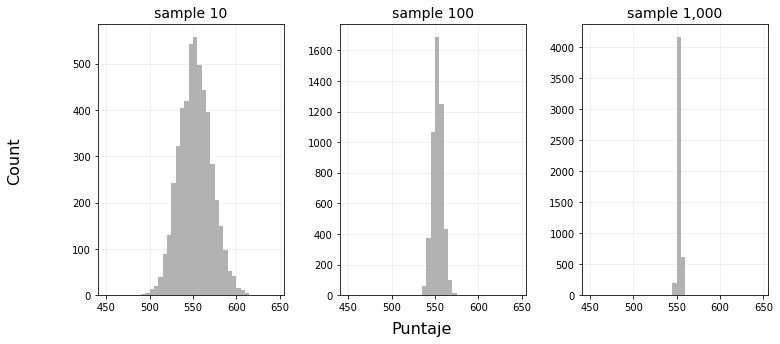

In [15]:
fig = plt.figure(figsize=(12,5))
spec = plt.GridSpec(ncols=3, nrows=1, wspace=0.3)
bins = np.arange(450, 650, 5)

#Para muestra tamaño 10
ax0 = fig.add_subplot(spec[0])
ax0.hist(results['result'].loc[results['type'] == 'sample 10'], bins=bins, color='black', alpha=0.3)
ax0.set_title('sample 10', fontsize=14)
ax0.grid(alpha=0.2)

#Para muestra tamaño 100
ax1 = fig.add_subplot(spec[1])
ax1.hist(results['result'].loc[results['type'] == 'sample 100'], bins=bins, color='black', alpha=0.3)
ax1.set_title('sample 100', fontsize=14)
ax1.grid(alpha=0.2)

#Para muestra tamaño 1_000
ax1 = fig.add_subplot(spec[2])
ax1.hist(results['result'].loc[results['type'] == 'sample 1000'], bins=bins, color='black', alpha=0.3)
ax1.set_title('sample 1,000', fontsize=14)
ax1.grid(alpha=0.2)

#Anotaciones y estilo global
fig.supxlabel('Puntaje', fontsize=16)
fig.supylabel('Count', fontsize=16)

plt.show()

Calculando el error estándar utilizando $\bar{X}$

In [16]:
for sample_size in results['type'].unique():
    std_err = results['result'].loc[results['type'] == sample_size].std()
    print(f"std. err. {sample_size}:\t{std_err:.2f}")

std. err. sample 10:	18.74
std. err. sample 100:	5.89
std. err. sample 1000:	1.74


Calculando el error estándar utilizando $x$

In [17]:
for i in n:
    std_err = enlace['esp_3'].std() / np.sqrt(i)
    print(f"std. err. n={i:,}: {std_err:.2f}")

std. err. n=10: 18.74
std. err. n=100: 5.93
std. err. n=1,000: 1.87


Los errores estándar obtenidos con la desviación estándar de la distribución muestral de la media ($\bar{X}$) son muy similares a los obtenidos con $x$

---